<a href="https://colab.research.google.com/github/Suyash-28-commits/Wine-Quality-Prediction/blob/main/Wine_Quality_Prediction(Feature_Scaling).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
wine = pd.read_csv('/content/drive/MyDrive/wine_data.csv',header=None,usecols=[0,1,2])
wine.columns = ['Class label','Alcohol','Malic acid']

In [ ]:
wine.sample(5)

,Class label,Alcohol,Malic acid
73,2,12.99,1.67
22,1,13.71,1.86
129,2,12.04,4.30
31,1,13.58,1.66
96,2,11.81,2.12


In [ ]:
wine.shape

(178, 3)

In [ ]:
#Standerdization (Z-Score Normalization)
#Performing train test split
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(wine.drop('Class label',axis=1),wine['Class label'],test_size=0.2,random_state=42)
X_train.shape , X_test.shape

((142, 2), (36, 2))

In [ ]:
#Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train,y_train)#it learns the parameters(mean and standard deviation)

StandardScaler()

In [ ]:
#Transform the data into scaled data(range : -1 to +1)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [ ]:
#Linear Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [ ]:
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

LogisticRegression()

In [ ]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print("Actual: ",accuracy_score(y_test,y_pred))
print("Scaled: ",accuracy_score(y_test,y_pred_scaled))
#Logistic Regression should give a better accuracy after scaling
#But here the accuracy isn't affected because the data is well balanced(there is no extreme class imbalance)
#Data is fairly clean enough also

Actual:  0.7777777777777778
Scaled:  0.7777777777777778


In [ ]:
#Decision tree
#It works on the basis of thresholds
from sklearn.tree import DecisionTreeClassifier
dr = DecisionTreeClassifier()
dr_scaled = DecisionTreeClassifier()

In [ ]:
dr.fit(X_train,y_train)
dr_scaled.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = dr.predict(X_test)
y_pred_scaled = dr.predict(X_test_scaled)

In [ ]:
#Scaling shouldn't affect model's accuracy in case of Decision trees
#But here the case is opposite , likely due to scaling causes change in randomness or calculations in a decision tree
print("Actual score: ",accuracy_score(y_test,y_pred))
print("Scaled score: ",accuracy_score(y_test,y_pred_scaled))

Actual score:  0.8055555555555556
Scaled score:  0.3888888888888889


In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn_scaled = KNeighborsClassifier()

In [ ]:
knn.fit(X_train,y_train)
knn_scaled.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn.predict(X_test)
y_pred_scaled = knn_scaled.predict(X_test_scaled)

In [ ]:
print("Actual Score: ",accuracy_score(y_test,y_pred))
print("Scaled Score: ",accuracy_score(y_test,y_pred_scaled))

Actual Score:  0.8333333333333334
Scaled Score:  0.8055555555555556


In [ ]:
#Support Vector Machine
#Linear Support Vector Machine
from sklearn.svm import SVC
svm = SVC(kernel='linear')
svm_scaled = SVC(kernel='linear')

In [ ]:
svm.fit(X_train,y_train)
svm_scaled.fit(X_train_scaled,y_train)

SVC(kernel='linear')

In [ ]:
y_pred = svm.predict(X_test)
y_pred_scaled = svm_scaled.predict(X_test_scaled)

In [ ]:
print("Actual score: ",accuracy_score(y_test,y_pred))
print("Scaled score: ",accuracy_score(y_test,y_pred_scaled))

Actual score:  0.7777777777777778
Scaled score:  0.8055555555555556


In [ ]:
#Radial basis function(RBf) Kernel Support Vector Machine / Gaussian Kernel Support Vector Machine
svc_rbf = SVC(kernel='rbf')
svc_rbf_scaled = SVC(kernel='rbf')

In [ ]:
svc_rbf.fit(X_train,y_train)
svc_rbf_scaled.fit(X_train_scaled,y_train)

SVC()

In [ ]:
y_pred = svc_rbf.predict(X_test)
y_pred_scaled = svc_rbf_scaled.predict(X_test_scaled)

In [ ]:
print("Actual score:",accuracy_score(y_test,y_pred))
print("Scaled score:",accuracy_score(y_test,y_pred_scaled))
#Radial basis function kernel improved Support Vector Classifier's performance

Actual score: 0.8055555555555556
Scaled score: 0.8888888888888888


In [ ]:
#Ploynomial Kernel Support Vector Macine(SVM)
svm_poly = SVC(kernel='poly')
svm_poly_scaled = SVC(kernel='poly')

In [ ]:
svm_poly.fit(X_train,y_train)
svm_poly_scaled.fit(X_train_scaled,y_train)

SVC(kernel='poly')

In [ ]:
y_pred = svm_poly.predict(X_test)
y_pred_scaled = svm_poly_scaled.predict(X_test_scaled)

In [ ]:
print("Actual Score: ",accuracy_score(y_test,y_pred))
print("Scaled Score: ",accuracy_score(y_test,y_pred_scaled))
#Polynomial Kernel SVM's performance is less than RBF Kernel SVM
#This is because RBF is more smother than Polynomial kernel SVM

Actual Score:  0.8055555555555556
Scaled Score:  0.8333333333333334


In [ ]:
#Normalization
#1->MinMaxScaling
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(wine.drop('Class label',axis=1),wine['Class label'],test_size=0.3,random_state=42)
X_train.shape , X_test.shape

((124, 2), (54, 2))

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(X_train)#It learns max and min of the data

MinMaxScaler()

In [ ]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn_scaled = KNeighborsClassifier()

In [ ]:
knn.fit(X_train,y_train)
knn_scaled.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn.predict(X_test)
y_pred_scaled = knn_scaled.predict(X_test_scaled)

In [ ]:
print("Actual Score: ",accuracy_score(y_test,y_pred))
print("Scaled Score: ",accuracy_score(y_test,y_pred_scaled))
#In balanced datsets , scaling reduces the dominant class effects

Actual Score:  0.7962962962962963
Scaled Score:  0.7592592592592593


In [ ]:
from sklearn.svm import SVC
svm_linear = SVC(kernel='linear')
svm_linear_scaled = SVC(kernel='linear')

In [ ]:
svm_linear.fit(X_train,y_train)
svm_linear_scaled.fit(X_train_scaled,y_train)

SVC(kernel='linear')

In [ ]:
y_pred = svm_linear.predict(X_test)
y_pred_scaled = svm_linear_scaled.predict(X_test_scaled)

In [ ]:
print("Actual Score: ",accuracy_score(y_test,y_pred))
print("Scaled Score: ",accuracy_score(y_test,y_pred_scaled))
#Scaling increases the accuracy in case of Linear Support Vector Machine

Actual Score:  0.7407407407407407
Scaled Score:  0.7592592592592593


In [ ]:
#Radial Basis Function Support Vector Machine
from sklearn.svm import SVC
svm_rbf = SVC(kernel="rbf")
svm_rbf_scaled = SVC(kernel="rbf")

In [ ]:
svm_rbf.fit(X_train,y_train)
svm_rbf_scaled.fit(X_train_scaled,y_train)

SVC()

In [ ]:
y_pred = svc_rbf.predict(X_test)
y_pred_scaled = svc_rbf_scaled.predict(X_test_scaled)

In [ ]:
print("Actual Score: ",accuracy_score(y_test,y_pred))
print("Scaled Score: ",accuracy_score(y_test,y_pred_scaled))
#Scaling accuracy decreased

Actual Score:  0.7592592592592593
Scaled Score:  0.46296296296296297


In [ ]:
wine.sample(5)

,Class label,Alcohol,Malic acid
74,2,11.96,1.09
93,2,12.29,2.83
27,1,13.30,1.72
50,1,13.05,1.73
40,1,13.56,1.71


<Axes: title={'center': 'Malic acid'}, ylabel='Malic acid'>

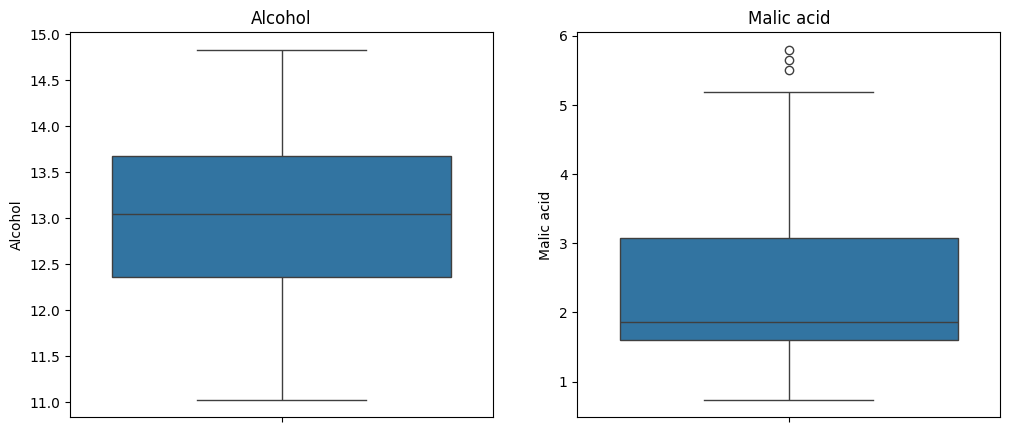

In [ ]:
fig , (ax1,ax2) = plt.subplots(ncols=2 , figsize=(12,5))
ax1.set_title("Alcohol")
sns.boxplot(wine['Alcohol'],ax=ax1)
ax2.set_title("Malic acid")
sns.boxplot(wine['Malic acid'],ax=ax2)
#Malic acid distribution is positively(right) skewed

<Axes: xlabel='Alcohol', ylabel='Density'>

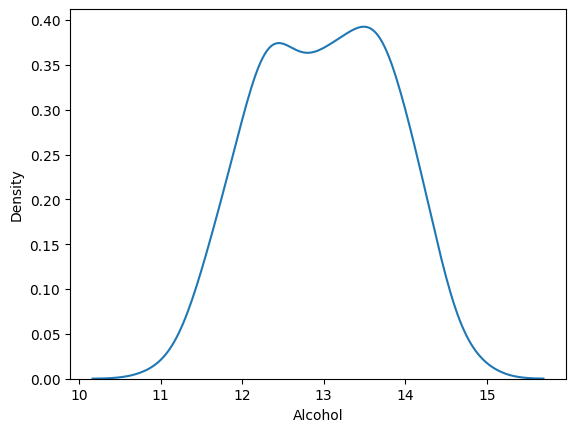

In [ ]:
sns.kdeplot(wine['Alcohol']) #bimodal distribution

<Axes: xlabel='Malic acid', ylabel='Density'>

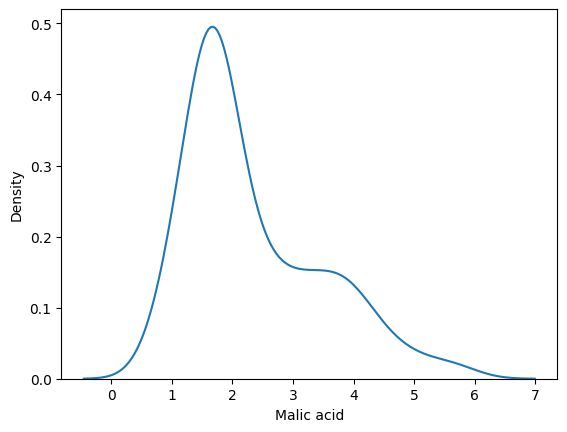

In [ ]:
sns.kdeplot(wine['Malic acid'])#unimodal right(positive skewed distribution)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(wine.drop('Class label',axis=1),wine['Class label'],test_size=0.3,random_state=42)

In [ ]:
#Robust Scaler
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

#Fit the training data, it will learn median and IQR(Inter Quartile Range)
scaler.fit(X_train)

RobustScaler()

In [ ]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns)

<Axes: title={'center': 'After Scaling'}>

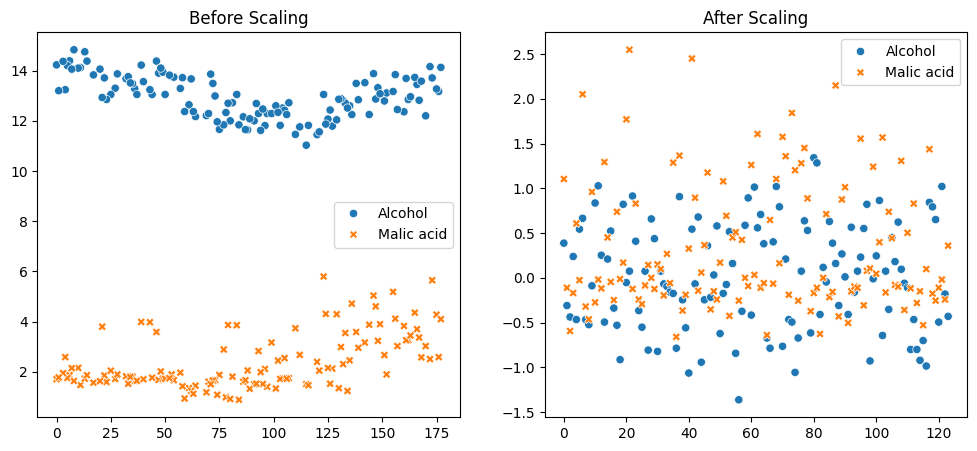

In [ ]:
fig , (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))
ax1.set_title("Before Scaling")
sns.scatterplot(X_train,ax=ax1)
ax2.set_title("After Scaling")
sns.scatterplot(X_train_scaled,ax=ax2)

<Axes: title={'center': 'After Scaling'}>

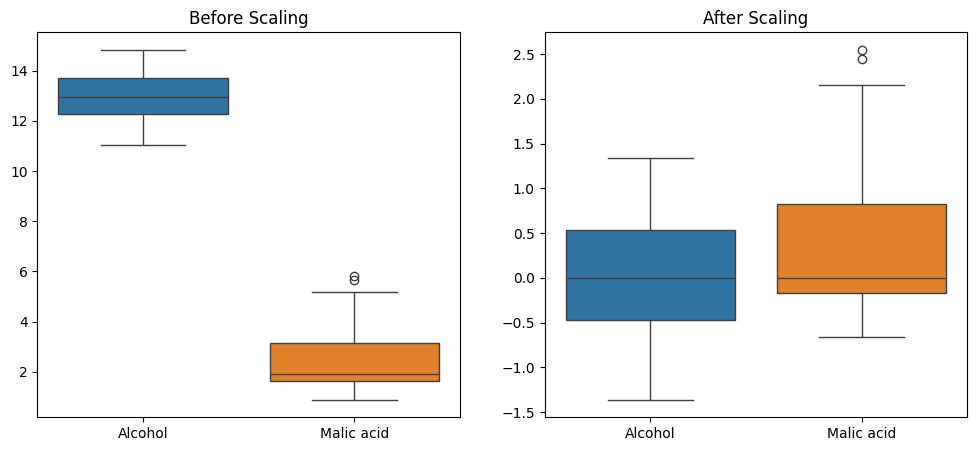

In [ ]:
fig , (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))
ax1.set_title("Before Scaling")
sns.boxplot(X_train,ax=ax1)
ax2.set_title("After Scaling")
sns.boxplot(X_train_scaled,ax=ax2)
#Upon robust scaling , IQR changes to 1 , and data is centred (median becomes equal to 1)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn_scaled = KNeighborsClassifier()

In [ ]:
knn.fit(X_train,y_train)
knn_scaled.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn.predict(X_test)
y_pred_scaled = knn_scaled.predict(X_test_scaled)

print("Actual Score: ",accuracy_score(y_test,y_pred))
print("Scaled Score: ",accuracy_score(y_test,y_pred_scaled))
#Scaling didn't increase the model's performance

Actual Score:  0.7962962962962963
Scaled Score:  0.7592592592592593


In [ ]:
#Linear Support Vector Machine
from sklearn.svm import SVC
svm_linear = SVC(kernel="linear")
svm_linear_scaled = SVC(kernel="linear")

In [ ]:
svm_linear.fit(X_train,y_train)
svm_linear_scaled.fit(X_train_scaled,y_train)

SVC(kernel='linear')

In [ ]:
y_pred = svm_linear.predict(X_test)
y_pred_scaled = svm_linear_scaled.predict(X_test_scaled)

In [ ]:
print("Actual Score: ",accuracy_score(y_test,y_pred))
print("Scaled Score: ",accuracy_score(y_test,y_pred_scaled))
#Scaling increases model's accuracy

Actual Score:  0.7407407407407407
Scaled Score:  0.7407407407407407


In [ ]:
from sklearn.svm import SVC
svm_rbf = SVC(kernel="rbf")
svm_rbf_scaled = SVC(kernel="rbf")

In [ ]:
svm_rbf.fit(X_train,y_train)
svm_rbf_scaled.fit(X_train_scaled,y_train)

SVC()

In [ ]:
y_pred = svm_rbf.predict(X_test)
y_pred_scaled = svm_rbf_scaled.predict(X_test_scaled)

In [ ]:
print("Actual score:",accuracy_score(y_test,y_pred))
print("Scaled score: ",accuracy_score(y_test,y_pred_scaled))
#scaling increased model's performance

Actual score: 0.7222222222222222
Scaled score:  0.8148148148148148


In [ ]:
wine.sample(5)

,Class label,Alcohol,Malic acid
120,2,11.45,2.40
96,2,11.81,2.12
173,3,13.71,5.65
164,3,13.78,2.76
11,1,14.12,1.48


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(wine.drop('Class label',axis=1),wine['Class label'],test_size=0.3,random_state=42)

In [ ]:
#Max Absolute Scaler
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()
scaler.fit(X_train,y_train)#fit the data , it will learn Maximum value

MaxAbsScaler()

In [ ]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn_scaled = KNeighborsClassifier()

In [ ]:
knn.fit(X_train,y_train)
knn_scaled.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn.predict(X_test)
y_pred_scaled = knn_scaled.predict(X_test_scaled)

In [ ]:
print("Actual Score: ",accuracy_score(y_test,y_pred))
print("Scaled Score: ",accuracy_score(y_test,y_pred_scaled))
#Scaling doesn't affect the acacuracy

Actual Score:  0.7962962962962963
Scaled Score:  0.7962962962962963


In [ ]:
from sklearn.svm import SVC
svm_linear = SVC(kernel='linear')
svm_linear_scaled = SVC(kernel='linear')

In [ ]:
svm_linear.fit(X_train,y_train)
svm_linear_scaled.fit(X_train_scaled,y_train)

SVC(kernel='linear')

In [ ]:
y_pred = svm_linear.predict(X_test)
y_pred_scaled = svm_linear_scaled.predict(X_test_scaled)

In [ ]:
print("Actual Score: ",accuracy_score(y_test,y_pred))
print("Scaled Score: ",accuracy_score(y_test,y_pred_scaled))
#Scaling reduced the performance

Actual Score:  0.7407407407407407
Scaled Score:  0.46296296296296297


In [ ]:
#RBF SVM
from sklearn.svm import SVC
svm_rbf = SVC(kernel="rbf")
svm_rbf_scaled = SVC(kernel="rbf")

In [ ]:
svm_rbf.fit(X_train,y_train)
svm_rbf_scaled.fit(X_train_scaled,y_train)

SVC()

In [ ]:
y_pred = svm_rbf.predict(X_test)
y_pred_scaled = svm_rbf_scaled.predict(X_test_scaled)

In [ ]:
print("Actual Score: ",accuracy_score(y_test,y_pred))
print("Scaled Score: ",accuracy_score(y_test,y_pred_scaled))
#Scaling increased model's performance

Actual Score:  0.7222222222222222
Scaled Score:  0.7962962962962963


In [ ]:
#Mean Normalization
import numpy as np
from sklearn.base import BaseEstimator ,TransformerMixin
class MeanNormalization(BaseEstimator,TransformerMixin):
  def __init__(self):
    self.mean_ = None
    self.max_ = None
    self.min_ = None

  def fit(self,X,y=None):
    X = np.asarray(X,dtype=float)
    self.mean_ = np.mean(X,axis=0)
    self.min_ = np.min(X,axis=0)
    self.max_ = np.max(X,axis=0)
    return self

  def transform(self,X):
    X=np.asarray(X,dtype=float)
    return (X - self.mean_)/self.max_ - self.min_


In [ ]:
#Standerdization (Z-Score Normalization)
class StanderdizationScaler(BaseEstimator,TransformerMixin):
  def __init__(self):
    self.mean_ = None
    self.std_ = None

  def fit(self,X,y=None):
    X = np.asarray(X,dtype=float)
    self.mean_ = np.mean(X,axis=0)
    self.std_ = np.mean(X,axis=0)
    return self

  def transform(self,X):
    X = np.asarray(X,dtype=float)
    return (X-self.mean_) /self.std_


In [ ]:
#Robust Scaling
class RobustScalingNormalization(BaseEstimator,TransformerMixin):
  def __init__(self):
    self.median_ =None
    self.iqr_ = None

  def fit(self,X,y=None):
    X = np.asarray(X,dtype=float)
    self.median_ =np.median(X,axix=0)
    q75,q25 = np.percentile(X,[75,25],axis=0)
    self.iqr_ = q75 - q25
    return self


  def transform(self,X):
    X = np.asarray(X,dtype=float)
    return (X - self.median_) / self.iqr_

In [ ]:
#Max Absolute Scaling
class MaxAbsoluteScaling(BaseEstimator,TransformerMixin):
  def __init__(self):
    self.max_abs_ = None

  def fit(self,X,y=None):
    X = np.asarray(X,dtype=float)
    self.max_abs_ = np.max(np.abs(X),axis=0)
    return self

  def transform(self,X):
    X = np.asarray(X,dtype=float)
    return X / self.max_abs_

In [ ]:
class MinMaxScaling(BaseEstimator,TransformerMixin):
  def __init__(self,feature_range=(0,1)):
    self.feature_range = feature_range
    self.min_ = None
    self.max_ = None

  def fit(self,X,y=None):
    X = np.asarray(X,dtype=float)
    self.min_ = np.min(X,axis=0)
    self.max_ = np.max(X,axis=0)
    return self

  def transform(self,X):
    X = np.asarray(X,dtype=float)
    data_range = self.max_ - self.min_
    X_std = (X - self.min_)/(self.max_ - self.min_)
    min_r , max_r = self.feature_range
    return X_std * (max_r - min_r) + min_r #Streching or shifting to new range



In [2]:
import json

# Path to the notebook you want to fix
file_path = "/content/drive/MyDrive/Colab Notebooks/Wine Quality Prediction(Feature Scaling).ipynb"

# Load the notebook as a JSON object
with open(file_path, "r", encoding="utf-8") as f:
    notebook_data = json.load(f)

# Remove broken widgets from metadata if they exist
if "widgets" in notebook_data.get("metadata", {}):
    print("Fixing metadata.widgets...")
    del notebook_data["metadata"]["widgets"]

# Save the cleaned notebook
with open(file_path, "w", encoding="utf-8") as f:
    json.dump(notebook_data, f, indent=1)

print("Notebook fixed and saved successfully.")

Notebook fixed and saved successfully.
